In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

path = "/content/drive/My Drive/PROJECT 1001/processed_dataset.csv"
data = pd.read_csv(path)
data = data.drop(['Unnamed: 0', 'ARR_DELAY', 'DISTANCE', 'TIME_DEP_DEL15', 'DelayScore', 'DelayScore_DEST', 'DELAY_PROB', 'DELAY_PROB_DEST', 'QUARTER'], axis=1)
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ARR_DEL15,AIR_TIME,PRCP,WDSP,VISIB,SLP,DELAY_TO_NO_DELAY_RATIO,DELAY_NO_DELAY_RATIO_DEST,TIME_GROUP_NUM,TIME_ARR_DEL15,TIME_ARR_DELAY,TIME_DEP_DELAY,CARRIER_TAXI_OUT,CARRIER_CARRIER_DELAY,CARRIER_NAS_DELAY,ORIGIN_TAXI_OUT,ORIGIN_CARRIER_DELAY,ORIGIN_NAS_DELAY,ORIGIN_LATE_AIRCRAFT_DELAY
0,1,30,2,0.0,251.0,0.02,11.6,10.0,1025.7,0.189537,0.146626,3,0.166133,1.575064,6.714174,18.168675,18.388806,17.685694,17.055532,18.620341,13.052774,21.548829
1,1,27,6,0.0,107.0,0.00,7.0,10.0,1030.8,0.189537,0.189076,6,0.273603,11.905879,17.489085,18.168675,18.388806,17.685694,17.055532,18.620341,13.052774,21.548829
2,1,22,1,0.0,79.0,0.00,5.5,8.4,1019.4,0.189537,0.239775,4,0.204976,5.457473,10.194971,18.168675,18.388806,17.685694,17.055532,18.620341,13.052774,21.548829
3,1,8,1,0.0,192.0,0.00,7.9,9.4,1026.6,0.189537,0.148148,3,0.166133,1.575064,6.714174,18.168675,18.388806,17.685694,17.055532,18.620341,13.052774,21.548829
4,1,15,1,0.0,50.0,0.00,4.8,10.0,1031.7,0.189537,0.350877,6,0.273603,11.905879,17.489085,23.094947,21.991548,12.894312,17.055532,18.620341,13.052774,21.548829


In [0]:
X = data.drop('ARR_DEL15' , axis=1)
y = data['ARR_DEL15']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

print(len(X_train))
print(len(X_test))
print(len(X_val))

284601
35136
31623


In [0]:
# Setting range for parameters
min_samples_split_values = np.arange(2, 602, 50)
min_samples_leaf_values = np.arange(2, 182, 15)

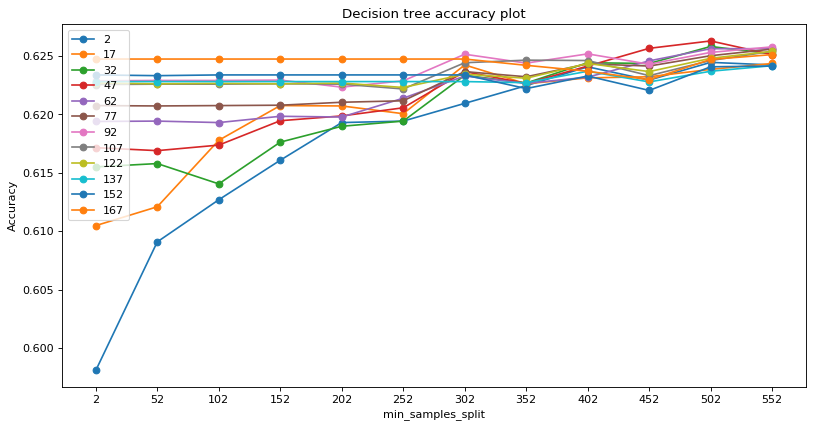

In [0]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

results = []
best_accuracy = 0
best_minleaf = 0
best_minsplit = 0

for i in min_samples_leaf_values:
    result = []
    for j in min_samples_split_values:
        clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i, min_samples_split=j)
        clf.fit(X_train, y_train)
        #print(i, j)
        accuracy = clf.score(X_val, y_val)
        if accuracy >= best_accuracy:
            best_accuracy = accuracy
            best_minleaf = i
            best_minsplit = j
        result.append(accuracy)
    results.append(result)

# Plot validation accuracies
fig=plt.figure(figsize=(12, 6), dpi= 80)
for i in range(len(results)):
    plt.plot(min_samples_split_values, results[i], marker='o', linestyle='-', label=min_samples_leaf_values[i])
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy') 
plt.xticks(min_samples_split_values)
plt.title('Decision tree accuracy plot')
plt.legend(loc='upper left')
plt.show()

In [0]:
print(best_accuracy)
print(best_minleaf)
print(best_minsplit)

0.626284666223951
47
502


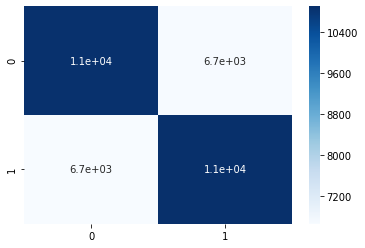

In [0]:
# Accuracy on test data
from sklearn.metrics import confusion_matrix
import seaborn as sns

clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=best_minleaf, min_samples_split=best_minsplit)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, cmap='Blues')